In [1]:
import findspark  
findspark.init()  
# run spark from jupyter notebook

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
df = spark.read.csv("sgHomeSolarData -211021.csv", inferSchema = True, header = True)

In [4]:
df.show()

+---+-----------------+--------------+-----+----------------+
| id|IOTSensorlocation|   Measurement|Value|        readDate|
+---+-----------------+--------------+-----+----------------+
|  1|         13111111|   Temperature| 21.6|14/09/2021 15:39|
|  2|         13111111|   Temperature| 24.0|14/09/2021 16:40|
|  3|         13111111|   Temperature| 24.0|14/09/2021 16:55|
|  4|         13111111|   Temperature| 24.0|14/09/2021 16:56|
|  5|         13111111|   Temperature| 24.0|14/09/2021 16:56|
|  6|         13111111|   Temperature| 24.0|14/09/2021 16:57|
|  7|         13111111|   Temperature| 24.0|14/09/2021 17:01|
|  8|         13111111|   Temperature| 24.0|14/09/2021 17:02|
|  9|         13111111|   Temperature| 21.6|14/09/2021 17:07|
| 10|         13111111|   Temperature| 21.6|14/09/2021 17:09|
| 11|   UpstairsAircon|   Temperature| 18.0|18/09/2021 17:37|
| 12|       PVarrayGen|WattsGenetated|218.0|18/09/2021 17:37|
| 13|       HouseUsage|  WattsMetered|  8.0|18/09/2021 17:37|
| 14|   

In [5]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- IOTSensorlocation: string (nullable = true)
 |-- Measurement: string (nullable = true)
 |-- Value: double (nullable = true)
 |-- readDate: string (nullable = true)



In [6]:
df.count()

420279

In [7]:
dfTemp = df.filter(df.Measurement =='Temperature')
dfTemp.describe('Value').show()

+-------+------------------+
|summary|             Value|
+-------+------------------+
|  count|            105078|
|   mean|17.711389634366853|
| stddev| 1.718113504500662|
|    min|              12.0|
|    max|              24.0|
+-------+------------------+



In [8]:

dfGen = df.filter(df.Measurement =='WattsGenerated')
dfGen.orderBy(dfGen.Value).show()

+-----+-----------------+--------------+-----+----------------+
|   id|IOTSensorlocation|   Measurement|Value|        readDate|
+-----+-----------------+--------------+-----+----------------+
| 2160|       PVarrayGen|WattsGenerated| -1.0|19/09/2021 14:45|
|18004|       PVarrayGen|WattsGenerated| -1.0| 20/09/2021 6:29|
| 2184|       PVarrayGen|WattsGenerated| -1.0|19/09/2021 14:47|
| 4880|       PVarrayGen|WattsGenerated| -1.0|19/09/2021 17:27|
| 4884|       PVarrayGen|WattsGenerated| -1.0|19/09/2021 17:28|
| 5232|       PVarrayGen|WattsGenerated| -1.0|19/09/2021 17:48|
| 5236|       PVarrayGen|WattsGenerated| -1.0|19/09/2021 17:49|
| 5992|       PVarrayGen|WattsGenerated| -1.0|19/09/2021 18:34|
| 5996|       PVarrayGen|WattsGenerated| -1.0|19/09/2021 18:34|
| 6028|       PVarrayGen|WattsGenerated| -1.0|19/09/2021 18:36|
| 6032|       PVarrayGen|WattsGenerated| -1.0|19/09/2021 18:36|
| 7284|       PVarrayGen|WattsGenerated| -1.0|19/09/2021 19:51|
| 7384|       PVarrayGen|WattsGenerated|

# Selecting Multiple Columns

In [9]:
df.select('Measurement','Value').show()

+--------------+-----+
|   Measurement|Value|
+--------------+-----+
|   Temperature| 21.6|
|   Temperature| 24.0|
|   Temperature| 24.0|
|   Temperature| 24.0|
|   Temperature| 24.0|
|   Temperature| 24.0|
|   Temperature| 24.0|
|   Temperature| 24.0|
|   Temperature| 21.6|
|   Temperature| 21.6|
|   Temperature| 18.0|
|WattsGenetated|218.0|
|  WattsMetered|  8.0|
|    WattsUsage|226.0|
|   Temperature| 18.0|
|WattsGenetated|216.0|
|  WattsMetered| 14.0|
|    WattsUsage|230.0|
|   Temperature| 18.0|
|WattsGenetated|212.0|
+--------------+-----+
only showing top 20 rows



In [10]:
# Filtering Data Multiple parameters

In [11]:
dfGen.orderBy(dfGen.Value.desc()).show()

+------+-----------------+--------------+------+----------------+
|    id|IOTSensorlocation|   Measurement| Value|        readDate|
+------+-----------------+--------------+------+----------------+
|141996|       PVarrayGen|WattsGenerated|5085.0|25/09/2021 11:39|
|141888|       PVarrayGen|WattsGenerated|5084.0|25/09/2021 11:33|
| 46124|       PVarrayGen|WattsGenerated|5084.0|21/09/2021 11:48|
|141920|       PVarrayGen|WattsGenerated|5082.0|25/09/2021 11:35|
|220032|       PVarrayGen|WattsGenerated|5082.0| 1/10/2021 11:59|
|220028|       PVarrayGen|WattsGenerated|5082.0| 1/10/2021 11:59|
|141908|       PVarrayGen|WattsGenerated|5080.0|25/09/2021 11:34|
|220036|       PVarrayGen|WattsGenerated|5080.0| 1/10/2021 11:59|
|141896|       PVarrayGen|WattsGenerated|5080.0|25/09/2021 11:33|
|141864|       PVarrayGen|WattsGenerated|5078.0|25/09/2021 11:31|
|219532|       PVarrayGen|WattsGenerated|5078.0| 1/10/2021 11:29|
|219692|       PVarrayGen|WattsGenerated|5078.0| 1/10/2021 11:39|
|141792|  

In [12]:
dfGen.filter(dfGen.Value > 5080).count()

6

In [13]:
df.filter((df.Measurement =='WattsGenerated') & (df.Value > 5000)).show() # && (df.Value > 5000)).show()

+-----+-----------------+--------------+------+----------------+
|   id|IOTSensorlocation|   Measurement| Value|        readDate|
+-----+-----------------+--------------+------+----------------+
| 2656|       PVarrayGen|WattsGenerated|5076.0|19/09/2021 15:15|
| 2668|       PVarrayGen|WattsGenerated|5002.0|19/09/2021 15:16|
|21176|       PVarrayGen|WattsGenerated|5044.0|20/09/2021 10:40|
|21272|       PVarrayGen|WattsGenerated|5001.0|20/09/2021 10:46|
|21288|       PVarrayGen|WattsGenerated|5004.0|20/09/2021 10:47|
|21300|       PVarrayGen|WattsGenerated|5006.0|20/09/2021 10:48|
|21304|       PVarrayGen|WattsGenerated|5026.0|20/09/2021 10:48|
|21308|       PVarrayGen|WattsGenerated|5005.0|20/09/2021 10:48|
|21312|       PVarrayGen|WattsGenerated|5004.0|20/09/2021 10:49|
|21344|       PVarrayGen|WattsGenerated|5002.0|20/09/2021 10:51|
|21348|       PVarrayGen|WattsGenerated|5008.0|20/09/2021 10:51|
|21356|       PVarrayGen|WattsGenerated|5002.0|20/09/2021 10:51|
|21632|       PVarrayGen|

In [14]:
# activity : find distinct the dates that > 5Kw was generated before 11:00am

In [15]:
# SQL queries

In [16]:
df.createOrReplaceTempView("solar")

In [17]:
sqlDF = spark.sql('select Measurement, Value, readDate from solar WHERE Measurement = "WattsGenerated" ORDER BY Value DESC')
sqlDF.show()

+--------------+------+----------------+
|   Measurement| Value|        readDate|
+--------------+------+----------------+
|WattsGenerated|5085.0|25/09/2021 11:39|
|WattsGenerated|5084.0|25/09/2021 11:33|
|WattsGenerated|5084.0|21/09/2021 11:48|
|WattsGenerated|5082.0|25/09/2021 11:35|
|WattsGenerated|5082.0| 1/10/2021 11:59|
|WattsGenerated|5082.0| 1/10/2021 11:59|
|WattsGenerated|5080.0|25/09/2021 11:34|
|WattsGenerated|5080.0| 1/10/2021 11:59|
|WattsGenerated|5080.0|25/09/2021 11:33|
|WattsGenerated|5078.0|25/09/2021 11:31|
|WattsGenerated|5078.0| 1/10/2021 11:29|
|WattsGenerated|5078.0| 1/10/2021 11:39|
|WattsGenerated|5078.0|25/09/2021 11:27|
|WattsGenerated|5078.0| 4/10/2021 11:47|
|WattsGenerated|5078.0|21/09/2021 11:51|
|WattsGenerated|5077.0|25/09/2021 11:19|
|WattsGenerated|5076.0|19/09/2021 15:15|
|WattsGenerated|5076.0|21/09/2021 11:48|
|WattsGenerated|5076.0|25/09/2021 11:27|
|WattsGenerated|5076.0|25/09/2021 11:33|
+--------------+------+----------------+
only showing top

In [18]:
sql = 'select Measurement, Value, readDate , NTILE(5) OVER ( ORDER BY Value DESC) value_group from solar'

In [19]:
sqlDF1 = spark.sql(sql)
sqlDF1.show()

+------------+------+----------------+-----------+
| Measurement| Value|        readDate|value_group|
+------------+------+----------------+-----------+
|WattsMetered|6489.0|29/09/2021 18:26|          1|
|  WattsUsage|6489.0|29/09/2021 18:26|          1|
|WattsMetered|6486.0|29/09/2021 18:23|          1|
|  WattsUsage|6486.0|29/09/2021 18:23|          1|
|WattsMetered|6480.0|29/09/2021 18:23|          1|
|  WattsUsage|6480.0|29/09/2021 18:23|          1|
|WattsMetered|6471.0|29/09/2021 18:26|          1|
|  WattsUsage|6471.0|29/09/2021 18:26|          1|
|WattsMetered|6469.0|29/09/2021 18:24|          1|
|  WattsUsage|6469.0|29/09/2021 18:24|          1|
|WattsMetered|6445.0|29/09/2021 18:25|          1|
|  WattsUsage|6445.0|29/09/2021 18:25|          1|
|WattsMetered|6439.0|29/09/2021 18:27|          1|
|  WattsUsage|6439.0|29/09/2021 18:27|          1|
|WattsMetered|6431.0|29/09/2021 18:24|          1|
|  WattsUsage|6431.0|29/09/2021 18:24|          1|
|WattsMetered|6424.0|29/09/2021

In [38]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [39]:
pdfGen = dfGen.toPandas()

In [40]:
pdfGen

,id,IOTSensorlocation,Measurement,Value,readDate
0,488,PVarrayGen,WattsGenerated,0.0,18/09/2021 18:07
1,492,PVarrayGen,WattsGenerated,0.0,18/09/2021 18:07
2,496,PVarrayGen,WattsGenerated,0.0,18/09/2021 18:07
3,500,PVarrayGen,WattsGenerated,0.0,18/09/2021 18:08
4,504,PVarrayGen,WattsGenerated,0.0,18/09/2021 18:08
...,...,...,...,...,...
104943,420261,PVarrayGen,WattsGenerated,4802.0,10/10/2021 11:25
104944,420265,PVarrayGen,WattsGenerated,4810.0,10/10/2021 11:25
104945,420269,PVarrayGen,WattsGenerated,4846.0,10/10/2021 11:26
104946,420273,PVarrayGen,WattsGenerated,4866.0,10/10/2021 11:26


In [41]:
pdfGen['readDate'] = pd.to_datetime(pdfGen['readDate'],dayfirst=True)
now  = datetime.now()
dateMask = (pdfGen['readDate'] > '20/09/2021 15:00') & (pdfGen['readDate'] < now)  # '08/08/2021')
pdfGen=pdfGen.loc[dateMask]

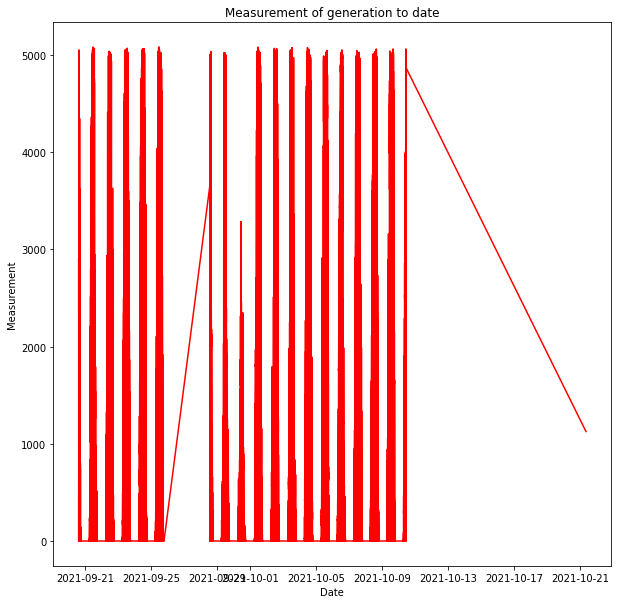

In [44]:
fig,ax = plt.subplots(figsize=(10, 10))
ax.plot(pdfGen['readDate'],pdfGen['Value'], color='red')
ax.set(xlabel="Date",
       ylabel="Measurement",
       title="Measurement of generation to date")
plt.show()

In [45]:
spark.stop()

# Running SQL Queries Programmatically

In [ ]:
# http://localhost:4040/environment/

In [15]:
spark.stop()